<a href="https://colab.research.google.com/github/sakuronohana/my_datascience/blob/master/udemy/mlaz/Part%206%20-%20Reinforcement%20Learning/Section%2033%20-%20Thompson%20Sampling/Python/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

Der Thompson Sampling-Algorithmus ist eine andere Art um das [Multi-Armed Bandit Problem](https://github.com/sakuronohana/my_datascience/blob/master/udemy/mlaz/Part%206%20-%20Reinforcement%20Learning/Section%2032%20-%20Upper%20Confidence%20Bound%20(UCB)/Python/upper_confidence_bound.ipynb) zu lösen. 

Der wesentliche Unterschied zur Upper Confidence Bound Methode besteht darin, dass bei der Thompson Sampling Methode mit einer Verteilung (engl. Distribution) gearbeitet wird. Dabei wird eine Verteilung dort erstellt wo die tatsächlichen Werte liegen könnten. Der Thompson Sampling Algorithmus grenzt also mittels eines [probabilistische](https://www.werbewoche.ch/marketing/2017-01-04/daten-probabilistisch-vs-deterministischen) Vorgehens den Beispielsbereich ein. Ein weitere Unterschiede zwischen UCB und TS ist, dass bei UCB nach jeder Runde der Status updaten muss während bei der TS der Update erst nach mehreren Runden (bspw. 200, 500 usw.). Dieser Unterschied hat auch einen Einfluss auf die Rechenperformance, da jeder Update auch Rechenleistung benötigt.

Die erwähnten Unterschiede machen den Thompson Sampling Algorithmus so beliebt, da er auch die besseren empirischen Beweise liefert.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
datloc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/udemy/mlaz/Part%206%20-%20Reinforcement%20Learning/Section%2033%20-%20Thompson%20Sampling/Python/Ads_CTR_Optimisation.csv'

dataset = pd.read_csv(datloc)

## Implementing Thompson Sampling

Wie auch schon im UCB-Algorithmus gibt es auch in der Thompson Sampling Methode verschieden Schritte, welche implementiert werden müssen.

<img src='https://github.com/sakuronohana/my_datascience/blob/master/udemy/mlaz/Part%206%20-%20Reinforcement%20Learning/Section%2033%20-%20Thompson%20Sampling/Thompson_Sampling_Slide.png?raw=true'>

In [20]:
import random

# Step 1 
N = 10000 # Anzahl Runden bzw. Benutzer welche auf Ads klicken
d = 10 # Anzahl Ads
ads_selected = []
numbers_of_rewards_1 = [0] *d
numbers_of_rewards_0 = [0] *d
total_reward = 0

for n in range(0,N): # Iteration durch Runden
  ad = 0
  max_random = 0
  for i in range(0,d): # Iteration durch Ads
    # Step 2
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    # Step 3
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  total_reward = total_reward + reward

## Visualising the results - Histogram

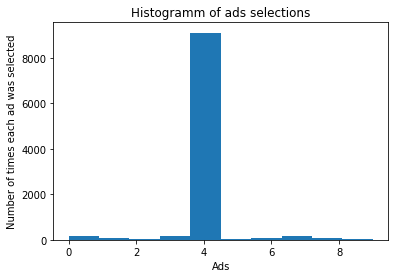

In [21]:
plt.hist(ads_selected)
plt.title('Histogramm of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

Wie auch schon beim UCB-Algorithmus hat auch Thompson Sampling den richtigen Ad Kandidaten (Nr. 4) erkoren. Zudem siehen wir auch in diesem Histogramm, dass der Algorithmus mit viel weniger Runde auskommen würde. Wir habe aus diesem Grund die Rundenzahl mutigerweise mal auf 100 gesetzt. Wie das nachfolgenden Histogramm zeigt, scheint der Thompson Sampling Algorithmus auch mit viel weniger Rund als UCB (min. 500) auszukommen. Wir konnten uns nun davon überzeugen, warum der TS beliebter ist als der UCB.

<img src='https://github.com/sakuronohana/my_datascience/blob/master/udemy/mlaz/Part%206%20-%20Reinforcement%20Learning/Section%2033%20-%20Thompson%20Sampling/Python/Thompson_Sampling_Resultat.png?raw=true' width='400' >